sample06_leaf_half_res_size60
   compactness: 0.42273100021
2275557.0 2275557


/opt/local/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/ipykernel/__main__.py:50: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 0; dimension is 288 but corresponding boolean dimension is 287


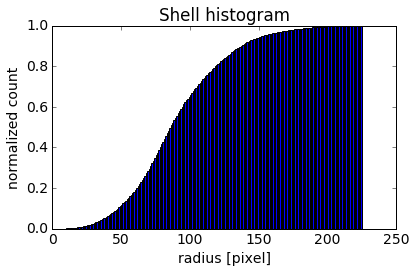

sample08_leaf_quarter_res
   compactness: 0.195186798305
146743.0 146743


/opt/local/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/ipykernel/__main__.py:50: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 0; dimension is 127 but corresponding boolean dimension is 126


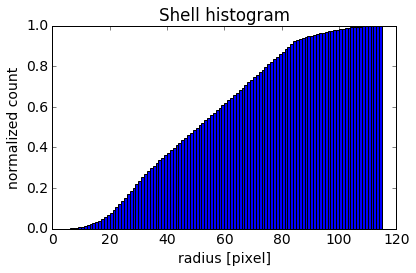

sample10_leaf_half_res_size40
   compactness: 0.512309006689
314892.0 314892


/opt/local/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/ipykernel/__main__.py:50: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 0; dimension is 241 but corresponding boolean dimension is 240


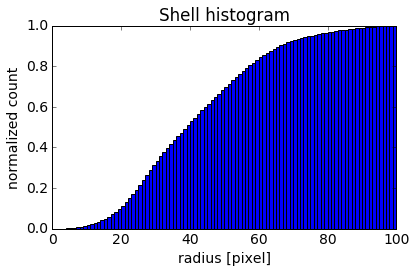

sample13_leaf_half_res_size60
   compactness: 0.543072570755
2913594.0 2913594


/opt/local/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/ipykernel/__main__.py:50: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 0; dimension is 249 but corresponding boolean dimension is 248


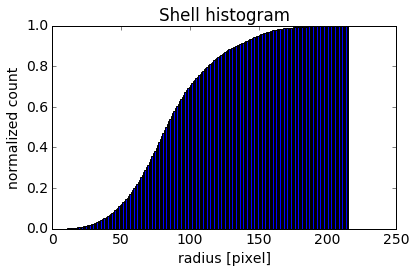

sample15_leaf_quarter_res
   compactness: 0.278695356277
118764.0 118764


/opt/local/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/ipykernel/__main__.py:50: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 0; dimension is 121 but corresponding boolean dimension is 120


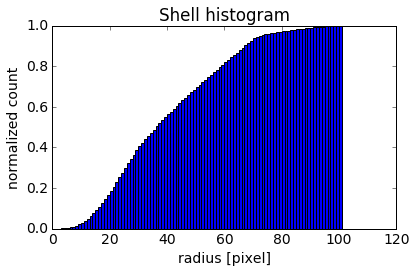

sample17_leaf_half_res_size50
   compactness: 0.463720496603
3918332.0 3918332


/opt/local/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/ipykernel/__main__.py:50: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 0; dimension is 261 but corresponding boolean dimension is 260


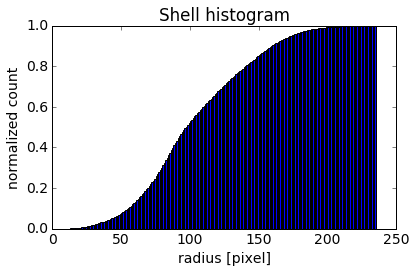

sample19_leaf_quarter_res
   compactness: 0.246520634969
2018018.0 2018018


/opt/local/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/ipykernel/__main__.py:50: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 0; dimension is 316 but corresponding boolean dimension is 315


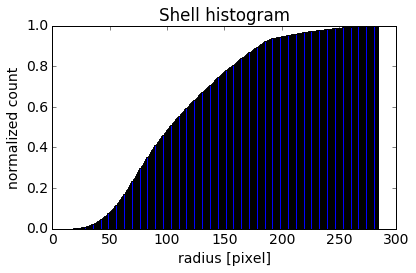

sample20_leaf_half_res_size60
   compactness: 0.625286523576
2058994.0 2058994


/opt/local/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/ipykernel/__main__.py:50: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 0; dimension is 276 but corresponding boolean dimension is 275


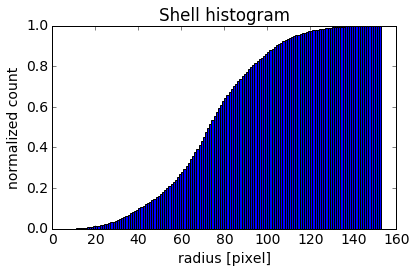

sample21_leaf_quarter_res
   compactness: 0.27360012668
320049.0 320049


/opt/local/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/ipykernel/__main__.py:50: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 0; dimension is 182 but corresponding boolean dimension is 181


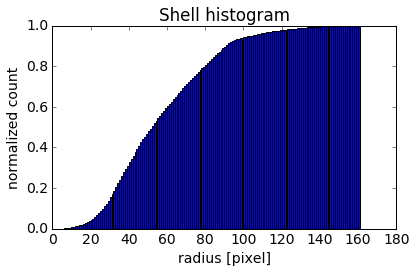

sample23_leaf_half_res_size50
   compactness: 0.441687972165
3232773.0 3232773


/opt/local/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/ipykernel/__main__.py:50: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 0; dimension is 365 but corresponding boolean dimension is 364


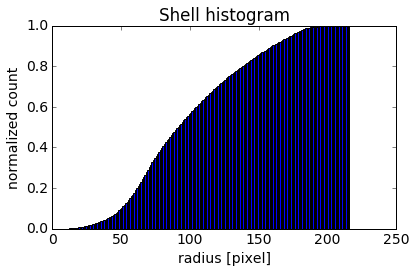

sample34_leaf_quarter_res
   compactness: 0.247328038979
2888632.0 2888632


/opt/local/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/ipykernel/__main__.py:50: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 0; dimension is 382 but corresponding boolean dimension is 381


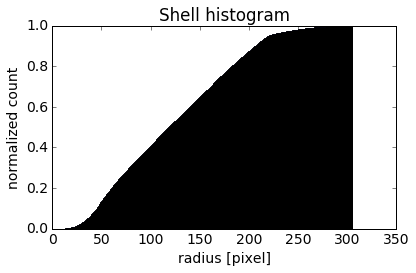

sample36_leaf_quarter_res
   compactness: 0.30922585192
684539.0 684539


/opt/local/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/ipykernel/__main__.py:50: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 0; dimension is 309 but corresponding boolean dimension is 308


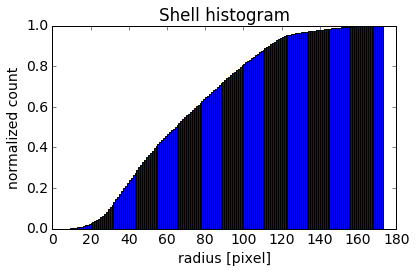

sample38_leaf_quarter_res
   compactness: 0.22657548938
331310.0 331310


/opt/local/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/ipykernel/__main__.py:50: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 0; dimension is 151 but corresponding boolean dimension is 150


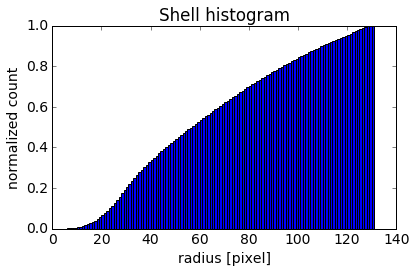

sample41_leaf_half_res_size30
   compactness: 0.5171569217
450928.0 450928


/opt/local/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/ipykernel/__main__.py:50: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 0; dimension is 188 but corresponding boolean dimension is 187


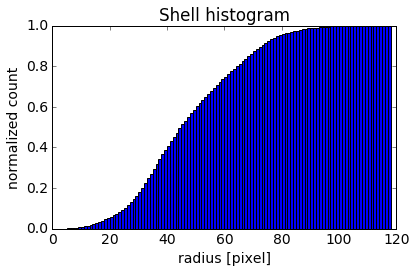

sample44_leaf_quarter_res
   compactness: 0.179878416103
276250.0 276250


/opt/local/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/ipykernel/__main__.py:50: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 0; dimension is 157 but corresponding boolean dimension is 156


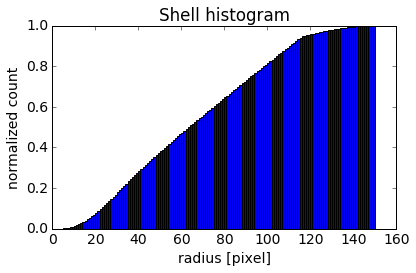

In [40]:
# calculate various leaf properties based on the segmented images

import glob
from nifti import *
import numpy as np
from pydescriptors.compactness import hz as compactness_hz
from pydescriptors.compactness import bribiesca as compactness_bribiesca
from pydescriptors.helpers import getSphere
from scipy.ndimage.measurements import center_of_mass
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
matplotlib.rcParams.update({'font.size': 14})
import pickle

# collect segmented leaf files
files = []
for file in glob.glob('data_files/*leaf*.nii.gz'):
    files.append(file)

# go through the files and calculate properties
for f in files:
    leaf = NiftiImage(f).asarray()

    X,Y,Z = leaf.nonzero()
    # see Eq. 4.8 for the definition of compactness:
    # https://ore.exeter.ac.uk/repository/bitstream/handle/10036/3026/MartinezOrtizC.pdf
    print f[11:-7]
    print '   compactness:',compactness_hz(X,Y,Z)
    
    # shell histogram
    #print np.shape(leaf)
    CoM = center_of_mass(leaf)
    
    nr_radii = int(np.max(np.shape(leaf))/2e0)
    radii = np.arange(nr_radii+1)
    x,y,z = np.ogrid[-CoM[0]:np.shape(leaf)[0]-CoM[0], -CoM[1]:np.shape(leaf)[1]-CoM[1],-CoM[2]:np.shape(leaf)[2]-CoM[2]]
    
    #print np.shape(x),np.shape(y),np.shape(z)
    
    count = np.zeros(nr_radii)
    
    for i in range(nr_radii):
        mask_outer = x*x + y*y + z*z <= radii[i+1]**2e0
        count[i] = np.sum(leaf[mask_outer])
        #print i,count[i]
    
    print np.max(count),np.sum(leaf)
    
    plt.bar(radii[count < np.max(count)],1e0*count[count < np.max(count)]/np.max(count),width=1)
    plt.xlabel('radius [pixel]')
    plt.ylabel('normalized count')
    plt.title('Shell histogram')
    plt.tight_layout()
    plt.savefig('imgs/shell_histo/shell_histo_'+f[11:-7]+'.png',dpi=100)
    plt.show()
    plt.close()
    
    file_name = 'data_files/shell_hist_'+f[11:-7]+'.dat'
    f = open(file_name,'w')
    pickle.dump([count],f)
    f.close()
        
    
    
